# Compare using different λ
- Vanilla Linear Regression
- Lasso Regression
- Ridge Regression
# Show scores R^2
- +(5/100) points in exam if: Compare against ElasticNet


#### Select a regression dataset from UCI ML https://archive.ics.uci.edu/ml/index.php 

### Selected Glass Identification (id=42) [glass+identification](https://archive.ics.uci.edu/dataset/42/glass+identification)  
- Dataset Characteristics: Multivariate
- Subject Area: Physics and Chemistry
- Associated Tasks: Classification
- Feature Type: Real
- \# Instances: 214
- \# Features: 9
- Has Missing Values? No 
- 

- CITE: B. German. "Glass Identification," UCI Machine Learning Repository, 1987. [Online]. Available: https://doi.org/10.24432/C5WW2P.
- python documentation: https://pypi.org/project/ucimlrepo/


#### Dataset Information
##### Additional Information

1. Id number: 1 to 214

2. RI: refractive index

3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

4. Mg: Magnesium

5. Al: Aluminum

6. Si: Silicon

7. K: Potassium

8. Ca: Calcium

9. Ba: Barium

10. Fe: Iron

11. Type of glass: (class attribute)

     -- 1 building_windows_float_processed

     -- 2 building_windows_non_float_processed

     -- 3 vehicle_windows_float_processed

     -- 4 vehicle_windows_non_float_processed (none in this database)

     -- 5 containers

     -- 6 tableware

     -- 7 headlamps

##### Class Labels

1: building_windows_float_processed

2: building_windows_non_float_processed

3: vehicle_windows_float_processed

4: vehicle_windows_non_float_processed (none in this database)

5: containers

6: tableware

7: headlamps

In [525]:
!pip install ucimlrepo

In [526]:
import matplotlib.pyplot as plt
import pandas as pd

In [527]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
glass_identification = fetch_ucirepo(id=42)
  



In [528]:
df = glass_identification.data.original
df.head(2)

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1


In [529]:
X_feature_name="RI"
X_feature_description="RI (Refractive Index)"
y_feature_name="Si"
y_feature_description="Si (Silicon)"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id_number      214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type_of_glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [530]:
df[X_feature_name].describe()

count    214.000000
mean       1.518365
std        0.003037
min        1.511150
25%        1.516522
50%        1.517680
75%        1.519157
max        1.533930
Name: RI, dtype: float64

In [531]:
df[y_feature_name].describe()

count    214.000000
mean      72.650935
std        0.774546
min       69.810000
25%       72.280000
50%       72.790000
75%       73.087500
max       75.410000
Name: Si, dtype: float64

In [532]:
df["Type_of_glass"].value_counts()

Type_of_glass
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [533]:
df.isnull().sum()

Id_number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type_of_glass    0
dtype: int64

In [534]:
# Convert information from pandas to numpy and leave a correct shape for X
X=df[X_feature_name].to_numpy()
print(X.shape)
m=X.shape[0]
print(m)
X=X.reshape(m,1)
X.shape

(214,)
214


(214, 1)

In [535]:
# Convert information from pandas to numpy and leave a correct shape for y
y=df[y_feature_name].to_numpy()
print(y.shape)
m=y.shape[0]
print(m)
y=y.reshape(m,1)
y.shape

(214,)
214


(214, 1)

Text(0.5, 1.0, 'Dataset')

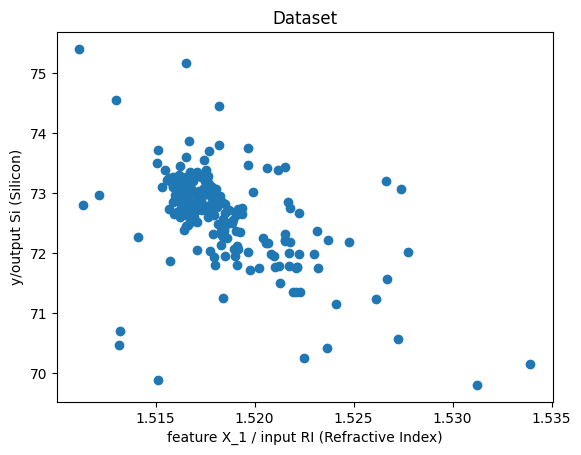

In [536]:
plt.scatter(X,y)
plt.xlabel(f"feature X_1 / input {X_feature_description}")
plt.ylabel(f"y/output {y_feature_description}")
plt.title("Dataset")

In [537]:
# Create a set of data for training and test to compare
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

In [538]:
X_train.shape

(171, 1)

In [539]:
X_test.shape

(43, 1)

In [540]:
from sklearn.linear_model import SGDRegressor

vanilla = SGDRegressor(penalty = None)
ridge = SGDRegressor(penalty = "l2",alpha = 0.4)
lasso = SGDRegressor(penalty="l1",alpha = 0.3)
elasticNet = SGDRegressor(penalty="elasticnet",alpha = 0.01,l1_ratio=0.5)


In [541]:
X_train=X_train.reshape(-1,1)
y_train=y_train.reshape(-1)
X_test=X_test.reshape(-1,1)
y_test=y_test.reshape(-1)

In [542]:
vanilla.fit(X_train,y_train)
ridge.fit(X_train,y_train)
lasso.fit(X_train,y_train)
elasticNet.fit(X_train,y_train)

SGDRegressor(alpha=0.01, l1_ratio=0.5, penalty='elasticnet')

In [543]:
y_hat_vanila=vanilla.predict(X_test)
y_hat_ridge=ridge.predict(X_test)
y_hat_lasso=lasso.predict(X_test)
y_hat_elasticNet=elasticNet.predict(X_test)

In [544]:
vanilla_score=vanilla.score(X_test,y_test)
ridge_score=ridge.score(X_test,y_test)
lasso_score=lasso.score(X_test,y_test)
elasticNet_score=elasticNet.score(X_test,y_test)

In [545]:
#?ridge.score

In [546]:

print(f"vanilla_score={vanilla_score}")
print(f"ridge_score={ridge_score}")
print(f"lasso_score={lasso_score}")
print(f"elasticNet_score={elasticNet_score}")


vanilla_score=-0.2591384931115859
ridge_score=-0.3715104150923296
lasso_score=-0.4154480572131276
elasticNet_score=-0.337153497116051


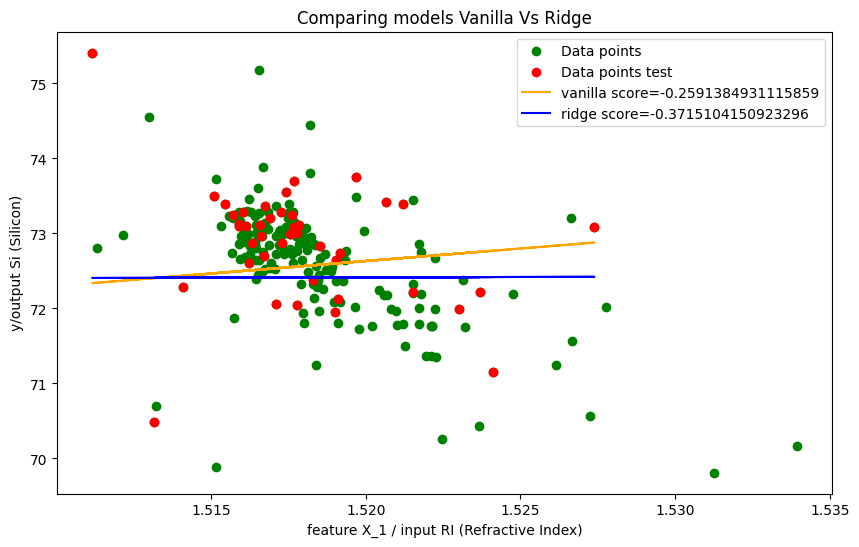

In [547]:
plt.figure(figsize=(10,6))
plt.scatter(X,y,c="g",label = "Data points ")
plt.scatter(X_test,y_test,c="r",label = "Data points test")
plt.plot(X_test,y_hat_vanila,label=f"vanilla score={vanilla_score}",c="orange")
plt.plot(X_test,y_hat_ridge,label=f"ridge score={ridge_score}",c='b')


plt.xlabel(f"feature X_1 / input {X_feature_description}")
plt.ylabel(f"y/output {y_feature_description}")
plt.title("Comparing models Vanilla Vs Ridge")
plt.legend()


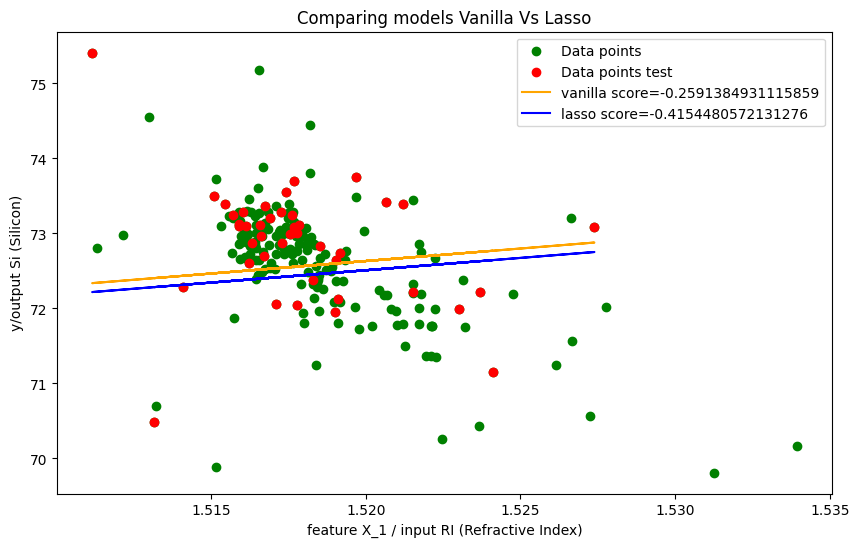

In [548]:
plt.figure(figsize=(10,6))
plt.scatter(X,y,c="g",label = "Data points ")
plt.scatter(X_test,y_test,c="r",label = "Data points test")
plt.plot(X_test,y_hat_vanila,label=f"vanilla score={vanilla_score}",c="orange")
plt.plot(X_test,y_hat_lasso,label=f"lasso score={lasso_score}",c='b')

plt.xlabel(f"feature X_1 / input {X_feature_description}")
plt.ylabel(f"y/output {y_feature_description}")
plt.title("Comparing models Vanilla Vs Lasso")
plt.legend()

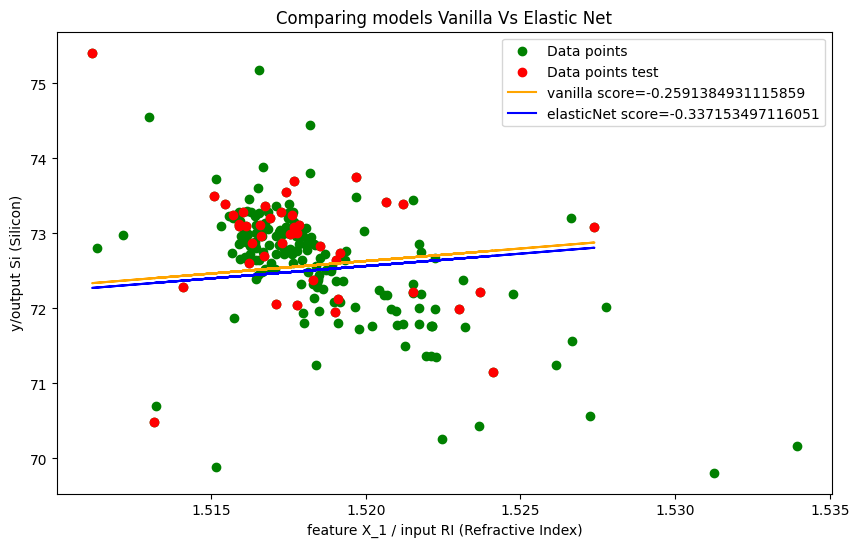

In [549]:
plt.figure(figsize=(10,6))
plt.scatter(X,y,c="g",label = "Data points ")
plt.scatter(X_test,y_test,c="r",label = "Data points test")
plt.plot(X_test,y_hat_vanila,label=f"vanilla score={vanilla_score}",c="orange")
plt.plot(X_test,y_hat_elasticNet,label=f"elasticNet score={elasticNet_score}",c='b')

plt.xlabel(f"feature X_1 / input {X_feature_description}")
plt.ylabel(f"y/output {y_feature_description}")
plt.title("Comparing models Vanilla Vs Elastic Net")
plt.legend()

In [550]:
from sklearn.linear_model import ElasticNet
elastic_net_model = ElasticNet(alpha = 0.01 ,l1_ratio=0.5)
elastic_net_model.fit(X_train,y_train)


ElasticNet(alpha=0.01)

In [551]:
y_pred_elastic_net = elastic_net_model.predict(X_test)

In [552]:
elastic_net_model_score=elastic_net_model.score(X_test,y_test)

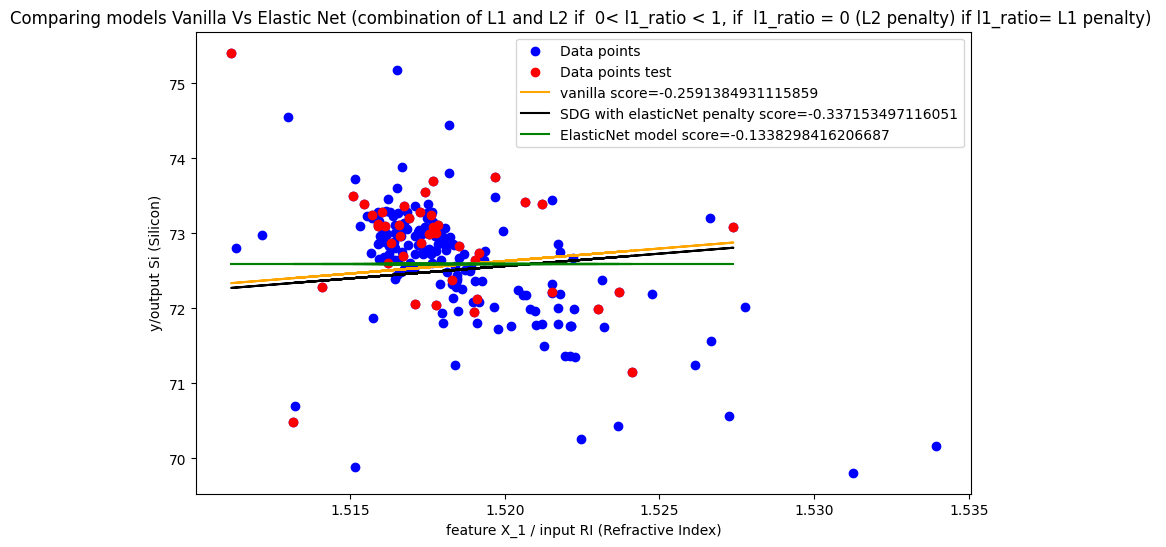

In [553]:
plt.figure(figsize=(10,6))
plt.scatter(X,y,c="b",label = "Data points ")
plt.scatter(X_test,y_test,c="r",label = "Data points test")
plt.plot(X_test,y_hat_vanila,label=f"vanilla score={vanilla_score}",c="orange")
plt.plot(X_test,y_hat_elasticNet,label=f"SDG with elasticNet penalty score={elasticNet_score}",c='k')
plt.plot(X_test,y_pred_elastic_net,label=f"ElasticNet model score={elastic_net_model_score}",c='g')

plt.xlabel(f"feature X_1 / input {X_feature_description}")
plt.ylabel(f"y/output {y_feature_description}")
plt.title("Comparing models Vanilla Vs Elastic Net (combination of L1 and L2 if  0< l1_ratio < 1, if  l1_ratio = 0 (L2 penalty) if l1_ratio= L1 penalty) ")
plt.legend()

### Comparativa de los diferentes modelos vanilla, Lasso (L1), Ridge(L2) y Elastic Net 
- Todos los escores son negativos lo que sugiere que los modelos de regresion  lineal no son los  adecuados para una regresion de una variable para este caso
- Tomando en cuenta que mientras mas negativo es el valor de el score $R^2$, peor es el modelo para este dataset a mi parecer:
    - Elastic Net tuvo un mejor resultado
    - Seguido de SDG vanila 
    - SDG ridge
    - SDG con elastic Net
    - SDG lasso
- Como comentario personal $R^2$ me supondria un valor positivo siempre. Pero no es asi en el caso de la implementacion de Sklearn
    
